In [ ]:
# https://drive.google.com/drive/folders/1pPFA1SuRT3uwFv9JABZL3S24NGV4f6b-?usp=drive_link

In [ ]:
import gdown

# URL của thư mục Google Drive
url = 'https://drive.google.com/drive/folders/1pPFA1SuRT3uwFv9JABZL3S24NGV4f6b-?usp=drive_link'

# Chuyển đổi URL sang định dạng gdown
gdown.download_folder(url, quiet=False)

Retrieving folder contents


Processing file 1Lea_Vtgr1PdF_CHKgjofDK94yLtPUCIW data.csv
Processing file 1yVG65pjczXRK1smtSQtFErFkS65_ki_P GenDataWithSMOGN.ipynb


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1Lea_Vtgr1PdF_CHKgjofDK94yLtPUCIW
To: /content/Gen Data with SMOGN/data.csv
100%|██████████| 10.9k/10.9k [00:00<00:00, 17.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yVG65pjczXRK1smtSQtFErFkS65_ki_P
To: /content/Gen Data with SMOGN/GenDataWithSMOGN.ipynb
100%|██████████| 943k/943k [00:00<00:00, 107MB/s]
Download completed


['/content/Gen Data with SMOGN/data.csv',
 '/content/Gen Data with SMOGN/GenDataWithSMOGN.ipynb']

# Khai báo các thư viện cần thiết

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
path = "Gen Data with SMOGN/data.csv"
data =  pd.read_csv(path)

# Thống kê mô tả dữ liệu

In [ ]:
data.head()

,PrintingTemperature,Printingspeed,Printinglayer,Bedtemperature,Strain,Youngsmodulus,PeakLoad
0,230.0,80.0,0.2,30.0,0.0620,48.387097,580.0
1,207.5,60.0,0.3,60.0,0.0682,73.313783,620.0
2,230.0,40.0,0.2,30.0,0.0972,51.440329,635.0
3,207.5,40.0,0.2,60.0,0.0626,79.872204,550.0
4,207.5,40.0,0.2,24.0,0.0582,85.910653,620.0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PrintingTemperature,151.0,207.127483,11.519725,185.000000,200.000000,207.500000,215.000000,230.000000
Printingspeed,151.0,59.337748,10.527001,40.000000,53.333333,60.000000,65.000000,80.000000
Printinglayer,151.0,0.194371,0.054497,0.100000,0.166667,0.200000,0.216667,0.300000
Bedtemperature,151.0,35.960265,11.176094,24.000000,28.500000,30.000000,45.000000,60.000000
Strain,151.0,0.066411,0.008731,0.056000,0.059700,0.062600,0.073117,0.097200
Youngsmodulus,151.0,75.299245,9.444912,48.387097,66.659947,78.728974,83.237988,89.285714
PeakLoad,151.0,616.208609,30.722276,550.000000,592.500000,618.333333,634.166667,685.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PrintingTemperature  151 non-null    float64
 1   Printingspeed        151 non-null    float64
 2   Printinglayer        151 non-null    float64
 3   Bedtemperature       151 non-null    float64
 4   Strain               151 non-null    float64
 5   Youngsmodulus        151 non-null    float64
 6   PeakLoad             151 non-null    float64
dtypes: float64(7)
memory usage: 8.4 KB


# Các cột dư liệu đều không bị thiếu dữ liệu và tất cả đều ở dạng float

PrintingTemperature (Nhiệt độ in):
Đây là nhiệt độ mà máy in 3D hoặc thiết bị in sử dụng trong quá trình in. Nhiệt độ này ảnh hưởng đến độ kết dính và chất lượng của vật liệu in.

Printingspeed (Tốc độ in):
Đây là tốc độ mà máy in 3D di chuyển khi đùn (extrude) vật liệu. Tốc độ in ảnh hưởng đến độ mịn, chi tiết của sản phẩm in, và thời gian in tổng thể.

Printinglayer (Độ dày lớp in):
Đây là độ dày của mỗi lớp vật liệu được in ra trong quá trình in 3D. Độ dày lớp càng mỏng thì chi tiết sản phẩm càng tốt, nhưng thời gian in sẽ lâu hơn.

Bedtemperature (Nhiệt độ bàn in):
Đây là nhiệt độ của bàn in (bed) trong máy in 3D. Bàn in thường được làm nóng để giúp vật liệu in bám dính tốt hơn, giảm nguy cơ bị cong hoặc tách lớp khi in.

Strain (Độ biến dạng):
Đây là một đại lượng đo lường sự biến dạng của vật liệu khi nó chịu lực. Trong ngữ cảnh này, nó có thể được đo khi vật liệu bị kéo, nén, hoặc chịu ứng suất khác.

Youngsmodulus (Mô-đun đàn hồi Young):
Đây là một đại lượng đo lường độ cứng của vật liệu, phản ánh khả năng chịu đựng biến dạng của vật liệu khi chịu ứng suất. Mô-đun Young càng cao thì vật liệu càng cứng và khó bị kéo giãn.

PeakLoad (Tải trọng đỉnh):
Đây là tải trọng lớn nhất mà vật liệu có thể chịu được trước khi bị hỏng hoặc phá vỡ. Trong các thử nghiệm cơ học, tải trọng đỉnh thường được đo để đánh giá độ bền của vật liệu.

# Vẽ phân phối của các cột dữ liệu

In [ ]:
def draw_histogram(data, col):
  """
  Hàm vẽ histogram từ một cột của DataFrame.

  Args:
    data: DataFrame chứa dữ liệu.
    cot: Tên cột cần vẽ histogram.
  """

  plt.hist(data[col], bins=20, edgecolor='black')  # Bạn có thể điều chỉnh số lượng bins
  plt.xlabel(col)
  plt.ylabel('Tần số')
  plt.title('Histogram của cột ' + col)
  plt.show()


def draw_histogram_seaborn(data, cot):
  """
  Hàm vẽ histogram bằng Seaborn.

  Args:
    data: DataFrame chứa dữ liệu.
    cot: Tên cột cần vẽ histogram.
  """

  sns.histplot(data=data, x=cot, kde=True)
  plt.title('Phân phối của cột ' + cot)
  plt.show()

In [ ]:
data.columns

Index(['PrintingTemperature', 'Printingspeed', 'Printinglayer',
       'Bedtemperature', 'Strain', 'Youngsmodulus', 'PeakLoad'],
      dtype='object')

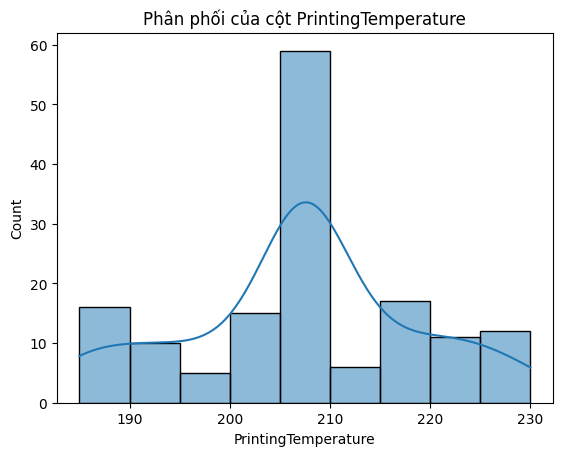

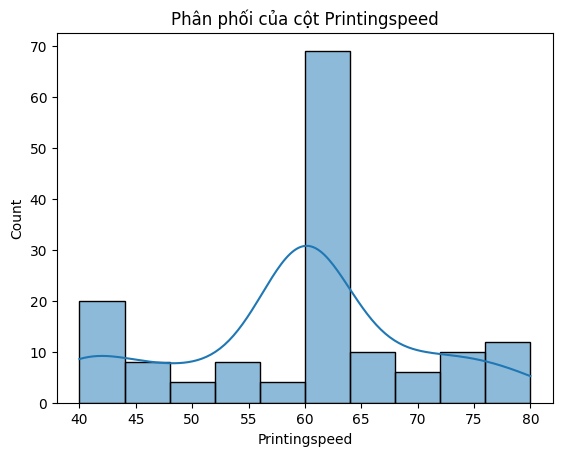

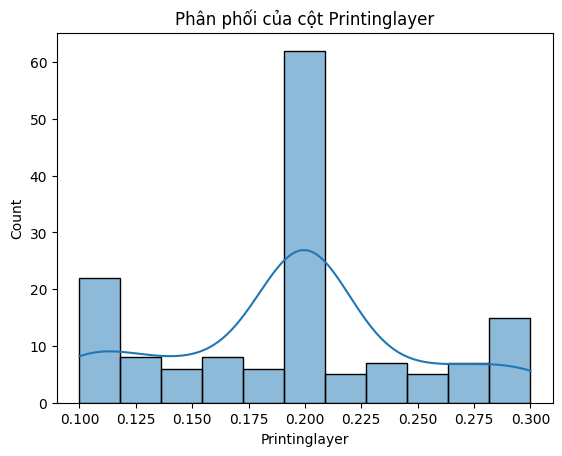

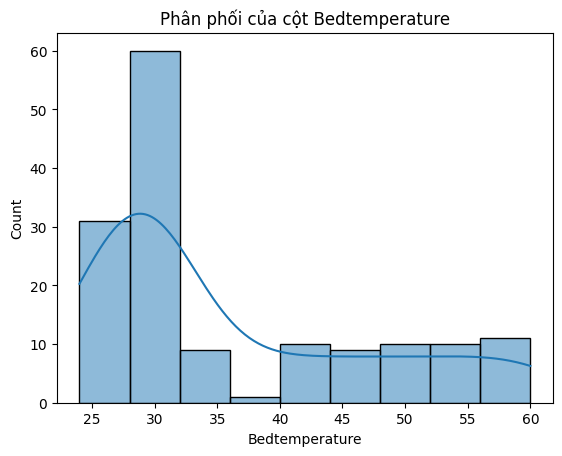

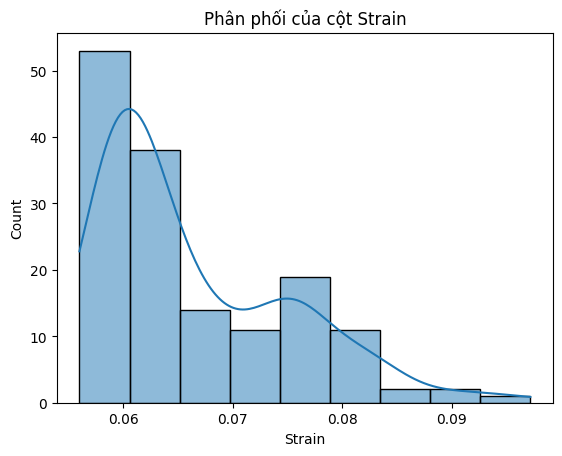

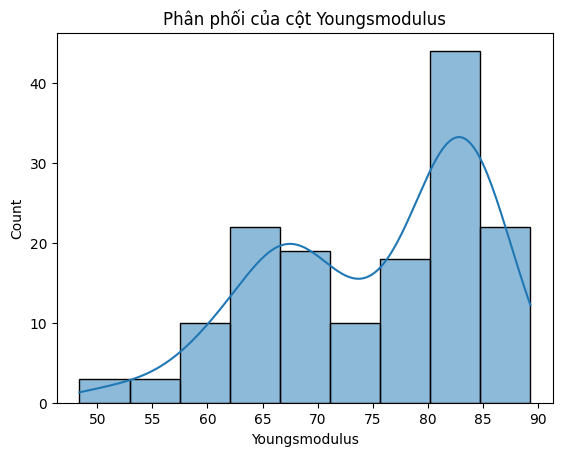

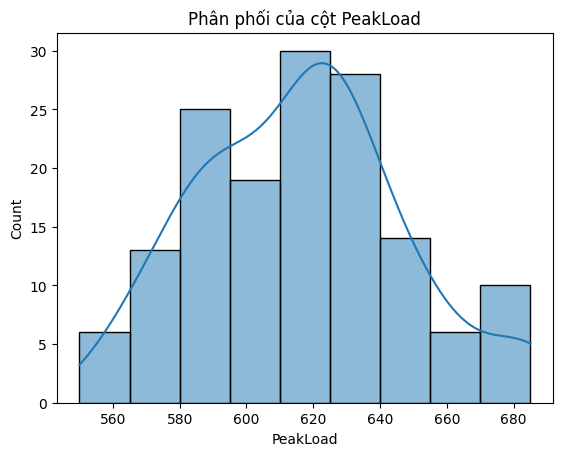

In [ ]:
col = ['PrintingTemperature', 'Printingspeed', 'Printinglayer',
       'Bedtemperature', 'Strain', 'Youngsmodulus', 'PeakLoad']
for i in col:
  draw_histogram_seaborn(data, i)

**Dữ liệu cột printing Temperature.**
+ Dữ liệu phân phối không đều tập trung nhiều vào 205 đến 210. Cho thấy nó lệch rất nhiều vào trung tâm.
+ Dữ liệu khôn mang tính đối xứng hai bên qua khoảng 205 đến 210
+ Dữ liệu bị ít so với các cột khác ở khoảng từ 195 đến 200 và 210 đến 215. Không đối xứng với nhau.
Đề xuất:  Cân bằng sao cho có số lượng tương tự như cột 200 đến 205,



**Dữ liệu cột Pringting speed.**
+ Dữ liệu này mất cân bằng. Tập trung nhiều vào cột 60 đến 65 dữ liệu chiếm đa số.
+ Dữ liệu bị thưa và rải rác rất nhiều ở các khoảng [50, 60]  và [70, 75].
+ Phân phối bị bất đối xứng về số lượng hai phía thông qua trung tâm.


**Dữ liệu cột Printinglayer.**
+ Tập trung cao tại giá trị 0.200: Dữ liệu phần lớn tập trung quanh giá trị 0.200, tương tự như các cột trước, với một lượng lớn mẫu so với các giá trị khác
+ Phân phối bất đối xứng và đa đỉnh: Phân phối cho thấy có nhiều đỉnh phụ tại các giá trị như 0.100 và 0.300, nhưng chúng xuất hiện với tần suất rất thấp. Các vùng giá trị khác như 0.125, 0.150, 0.225, 0.250 cũng có rất ít dữ liệu.
+ Mất cân bằng nghiêm trọng: phần lớn mẫu tập trung ở một giá trị trung tâm.

**Dữ liệu cột Bedtemperature**
+ Dữ liệu có xu hướng lệch trái từ khoảng [25, 30]. Ở khoảng này dữ liệu tập trung đông hơn các vị trí còn lại kể cả vị trí trung tâm.
+ Dữ liệu 35 đến 40 chiếm giá trị thiểu số và rất nhỏ so với các cột về phía bên phải từ giá trị trên 40 trở di.
+ Dữ liệu bất đối xứng và cần bổ sung dữ liệu cho cột từ 35 đến 40 so với các cột từ vị trí phía bên phải khác.

**Dữ liệu cột strain:**
+ Cột này vẫn có dữ liệu bất đối xứng và lệch về phía bên trái của dữ liệu.
+ Dữ liệu bị thưa ở các vị trí từ 0.08 đến 0.09 so với các cột còn lại.
+ Dữ liệu lệch rất nhiều về vị trí bên trái giá trị 0.06 đến 0.07.

**Dữ liệu cột Youngsmodulus**
+ Nói chung bị thiếu [50, 55] và  [70, 75]
+ Dữ liệu lệch về bên phải

**Dữ liệu cột PeakLoad**
+ Dữ liệu này mất cân bằng và khá đều hơn các cột dữ liệu khác
+ Có thể không cần tăng cường,
+ Nếu cân bằng thì cân bằng ở cột 560 và cột 660



# Các rủi ro có thể xảy ra:
1. Overfitting (Quá khớp dữ liệu)
Mô tả: Khi tăng cường dữ liệu cho các mẫu thiểu số bằng cách tạo ra các mẫu tổng hợp, mô hình có thể học quá chi tiết từ những mẫu tổng hợp này. Điều này dẫn đến việc mô hình ghi nhớ các mẫu cụ thể thay vì học các xu hướng tổng quát, làm giảm khả năng tổng quát hóa khi áp dụng trên dữ liệu mới.
Cách khắc phục: Sử dụng các kỹ thuật điều chuẩn (regularization) như L1, L2 để hạn chế overfitting, đồng thời kiểm tra hiệu suất mô hình trên tập kiểm tra (validation set).
2. Bias trong dữ liệu tổng hợp
Mô tả: Các mẫu tổng hợp có thể không hoàn toàn phản ánh đúng bản chất của dữ liệu thực tế. Nếu dữ liệu ban đầu có lỗi hoặc không đầy đủ, việc tổng hợp thêm dữ liệu có thể lan truyền hoặc thậm chí làm trầm trọng thêm các lỗi này.
Cách khắc phục: Thực hiện phân tích kỹ càng và làm sạch dữ liệu ban đầu trước khi sử dụng SMOGN. Xem xét các kỹ thuật phát hiện outlier để loại bỏ các mẫu không đại diện.
3. Làm mất cân bằng dữ liệu ngược (Reverse Imbalance)
Mô tả: Trong quá trình tăng cường dữ liệu thiểu số, có nguy cơ tạo ra quá nhiều dữ liệu tổng hợp, dẫn đến việc dữ liệu thiểu số lại trở nên chiếm ưu thế. Điều này gây mất cân bằng dữ liệu theo chiều ngược lại, làm sai lệch kết quả dự đoán của mô hình.
Cách khắc phục: Giám sát chặt chẽ tỷ lệ giữa các lớp và giới hạn số lượng dữ liệu tổng hợp để đảm bảo cân bằng hợp lý.
4. Phân bố không đồng nhất (Non-Homogeneous Distribution)
Mô tả: Nếu các mẫu tổng hợp được tạo ra mà không phản ánh đúng phân bố thực tế của dữ liệu, mô hình có thể học một phân bố sai lệch. Điều này đặc biệt quan trọng khi các mẫu thiểu số vốn đã có các đặc trưng khác biệt.
Cách khắc phục: Điều chỉnh các tham số của SMOGN (như rel_thres, under_samp) để đảm bảo rằng các mẫu tổng hợp vẫn duy trì được sự đa dạng và tính chất của dữ liệu gốc.
5. Tăng độ phức tạp tính toán
Mô tả: Việc tạo thêm dữ liệu tổng hợp sẽ làm tăng kích thước dữ liệu, từ đó tăng độ phức tạp tính toán, đặc biệt khi xử lý các mô hình có độ phức tạp cao hoặc dữ liệu lớn. Điều này có thể dẫn đến việc mất nhiều thời gian hơn trong huấn luyện mô hình.
Cách khắc phục: Đảm bảo việc tối ưu hóa mã nguồn và tài nguyên tính toán, đồng thời xem xét các phương pháp tăng tốc như sử dụng GPU hoặc giảm kích thước batch size.
6. Không phù hợp với tất cả các loại dữ liệu
Mô tả: SMOGN và các kỹ thuật tăng cường dữ liệu khác có thể không phù hợp với mọi loại dữ liệu. Chẳng hạn, với dữ liệu có cấu trúc phức tạp hoặc tương tác phi tuyến tính, việc tạo mẫu tổng hợp đơn giản có thể không hiệu quả.
Cách khắc phục: Nên thử nghiệm nhiều phương pháp khác nhau (SMOTE, ADASYN, gan-based augmentation, etc.) và lựa chọn phương pháp phù hợp nhất dựa trên đặc điểm dữ liệu.

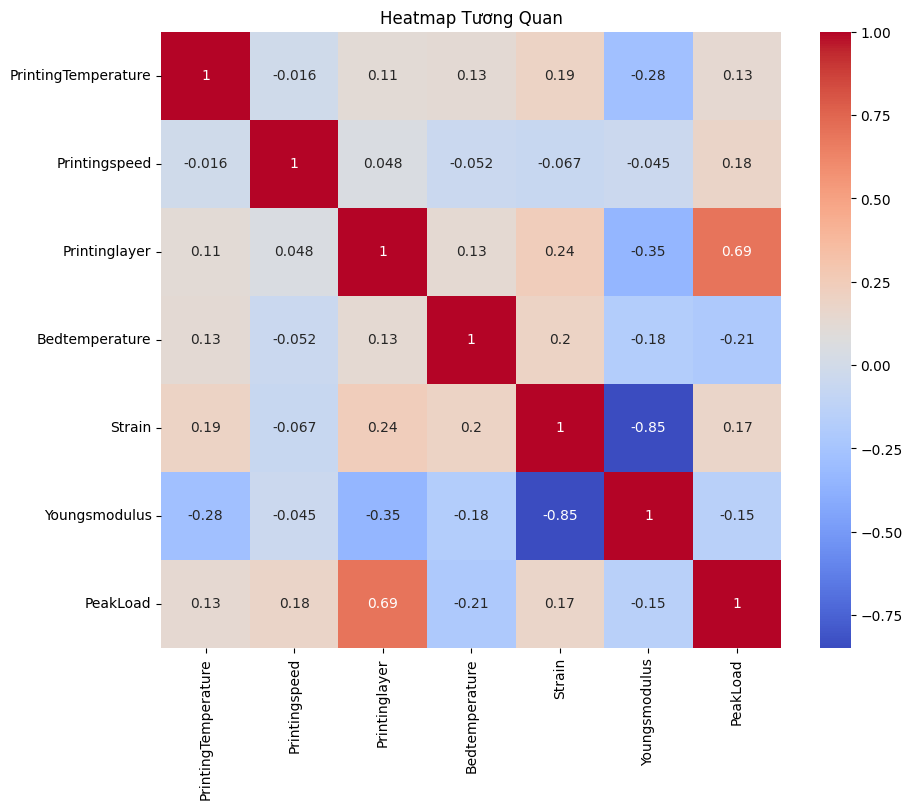

In [ ]:
def draw_correlation_heatmap(data):
  """
  Vẽ heatmap tương quan cho DataFrame.

  Args:
    data: DataFrame chứa dữ liệu.
  """

  # Tính ma trận tương quan
  corr_matrix = data.corr()

  # Vẽ heatmap
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
  plt.title('Heatmap Tương Quan')
  plt.show()

draw_correlation_heatmap(data)

# Cho thấy mối quan hệ giữa các biến khi cân bằng

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

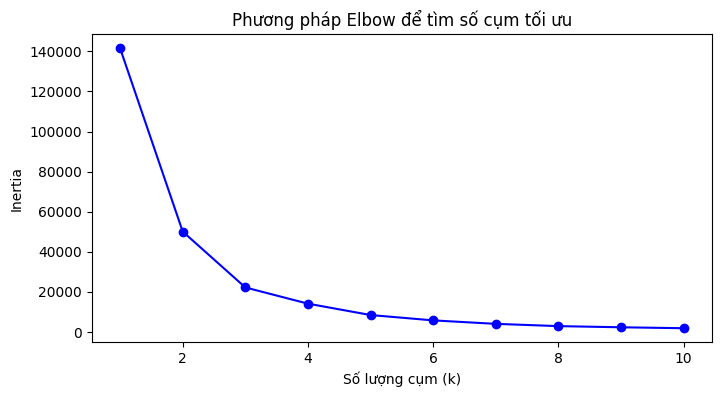

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

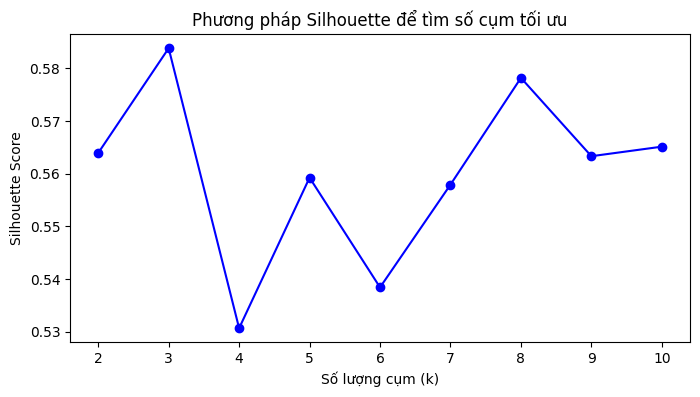

In [ ]:
# Tìm số lượng cụm tối ưu bằng phương pháp Elbow
inertia = []
K = range(1, 11)  # Thử từ 1 đến 10 cụm

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['PeakLoad']])
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Inertia')
plt.title('Phương pháp Elbow để tìm số cụm tối ưu')
plt.show()



# Tìm số lượng cụm tối ưu bằng Silhouette Score
silhouette_scores = []

for k in range(2, 11):  # Silhouette score cần ít nhất 2 cụm để tính
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['PeakLoad']])
    score = silhouette_score(data[['PeakLoad']], kmeans.labels_)
    silhouette_scores.append(score)

# Vẽ biểu đồ Silhouette
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Silhouette Score')
plt.title('Phương pháp Silhouette để tìm số cụm tối ưu')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


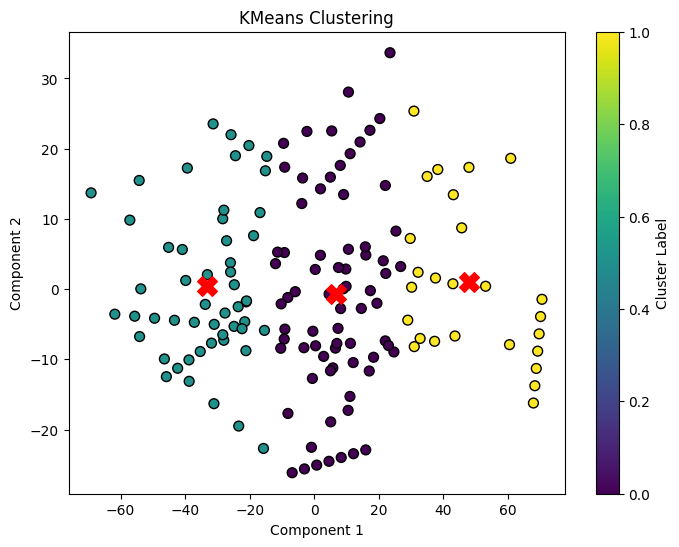

In [ ]:
from sklearn.decomposition import PCA

# Áp dụng PCA để giảm số chiều về 2 nếu dữ liệu có nhiều chiều
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Áp dụng KMeans để phân cụm dữ liệu
kmeans = KMeans(n_clusters=3)  # Thay đổi số cụm nếu cần
kmeans.fit(data_2d)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Vẽ phân cụm dữ liệu
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')  # Vẽ các centroid
plt.title('KMeans Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Tải thư viện SMOGN để giải quyết vấn đề về mất cân bằng dữ liệu trong bài toán regression

In [ ]:
!pip install smogn

In [ ]:
len(data)

151

In [ ]:
import smogn

# ['PrintingTemperature', 'Printingspeed', 'Printinglayer', 'Bedtemperature', 'Strain', 'Youngsmodulus', 'PeakLoad

data_smogn = data.copy() # Tạo dữ liệu copy từ dữ liệu gốc
data_smogn = smogn.smoter(
    ## main arguments
    data = data_smogn,           ## pandas dataframe
    y = 'Youngsmodulus',          ## string ('header name')
    k = 3,                    ## positive integer (k < n)
    samp_method = 'extreme',  ## string ('balance' or 'extreme')

    ## phi relevance arguments
    rel_thres = 0.40,         ## positive real number (0 < R < 1)
    # rel_method = 'manual',      ## string ('auto' or 'manual')
    rel_xtrm_type = 'high',   ## string ('low' or 'both' or 'high')
    rel_coef = 0.10         ## positive real number (0 < R)
)

r_index: 100%|##########| 39/39 [00:00<00:00, 465.32it/s]


In [ ]:
import pandas as pd

# Giả sử data và data_smogn là các DataFrame của bạn
# data = pd.DataFrame(...)
# data_smogn = pd.DataFrame(...)

# Xác định các cột chung giữa data và data_smogn
common_columns = [col for col in data.columns if col in data_smogn.columns]

# Tạo một DataFrame để lưu dữ liệu thiếu
missing_data = pd.DataFrame()

# Kiểm tra từng cột chung
for column in common_columns:
    # Lấy dữ liệu mà data có mà data_smogn không có cho cột hiện tại
    missing_values = data[~data[column].isin(data_smogn[column])]

    # Thêm các dữ liệu thiếu vào DataFrame
    missing_data = pd.concat([missing_data, missing_values], axis=0, ignore_index=True)

# Loại bỏ các giá trị trùng lặp
missing_data = missing_data.drop_duplicates()

# Thêm dữ liệu thiếu vào data_smogn
data_smogn = pd.concat([data_smogn, missing_data], axis=0, ignore_index=True)

# Xóa các hàng dư thừa không cần thiết (nếu có)
data_smogn = data_smogn.drop_duplicates().reset_index(drop=True)

print("Dữ liệu thiếu đã được thêm vào data_smogn.")
print(data_smogn.head())


Dữ liệu thiếu đã được thêm vào data_smogn.
   PrintingTemperature  Printingspeed  Printinglayer  Bedtemperature  \
0           220.654671      61.640293       0.120767       33.769781   
1           207.500000      60.000000       0.142081       47.375830   
2           218.225676      69.533934       0.190679       24.838919   
3           185.000000      54.724195       0.200000       25.582742   
4           207.500000      60.000000       0.112713       56.186044   

     Strain  Youngsmodulus    PeakLoad  
0  0.058969     127.954133  631.256594  
1  0.057969      86.302412  592.104028  
2  0.059442      84.766168  623.548648  
3  0.058925      84.832136  616.594757  
4  0.058968      84.598826  590.635659  


# Check số lượng dữ liệu nếu thiếu

In [ ]:
set_data = set(data.apply(tuple, axis=1))
set_data_smogn = set(data_smogn.apply(tuple, axis=1))

# Tính số lượng dòng dữ liệu từ data có trong data_smogn
common_rows = len(set_data & set_data_smogn)

print(f'Số lượng dòng dữ liệu từ data có trong data_smogn: {common_rows}')

Số lượng dòng dữ liệu từ data có trong data_smogn: 149


188


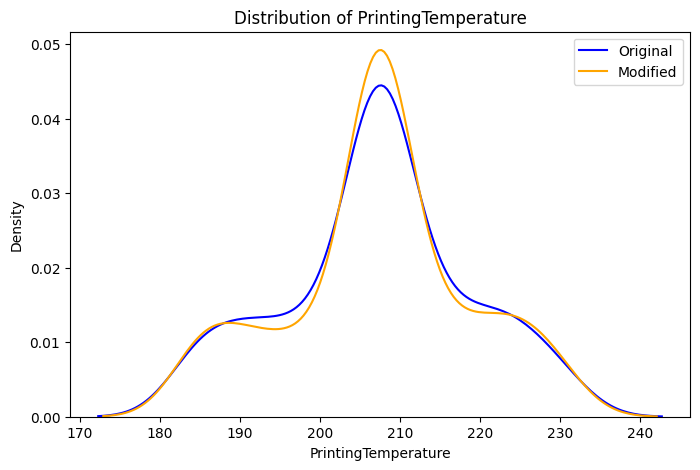

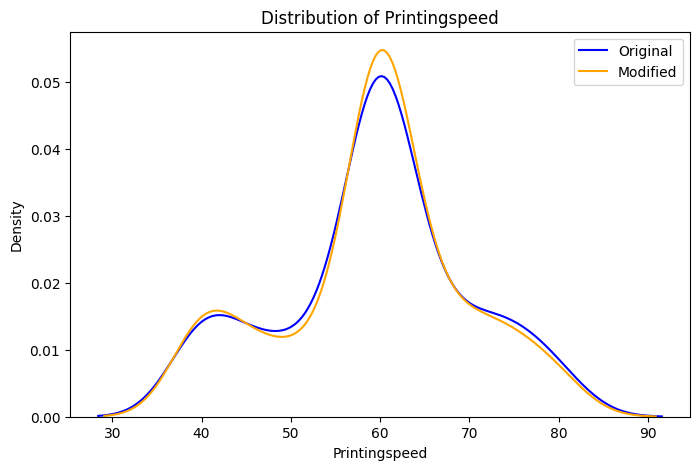

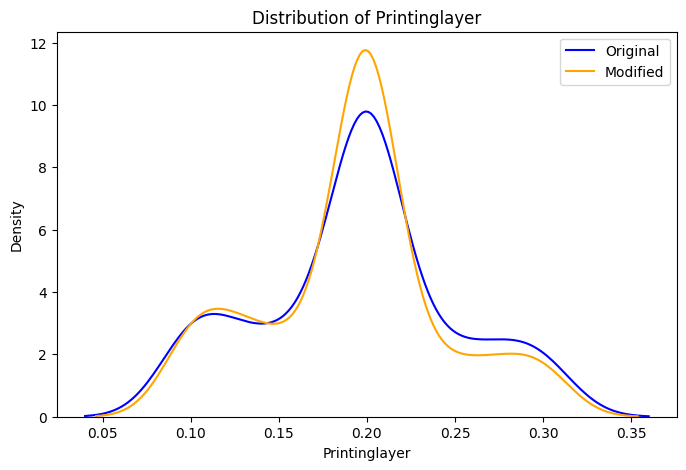

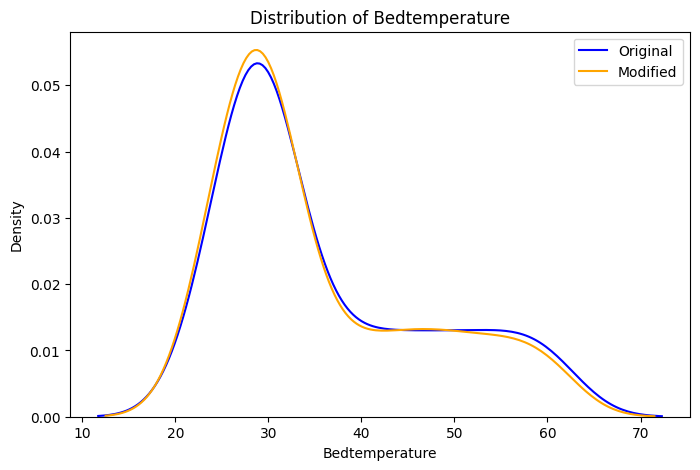

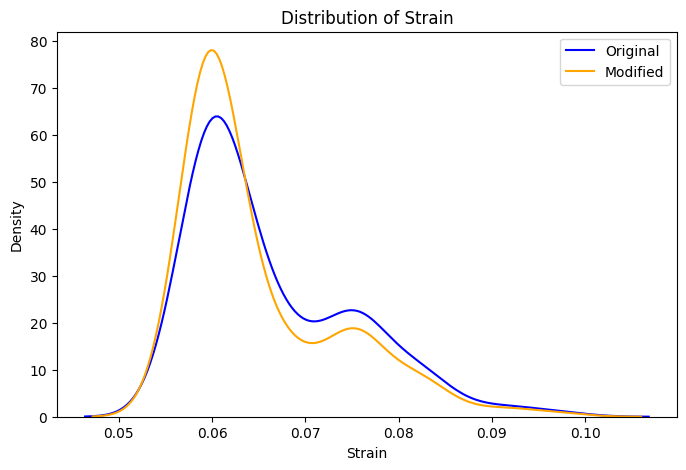

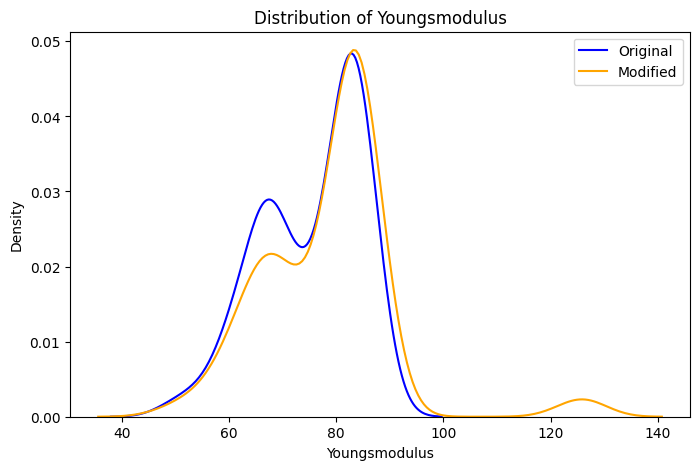

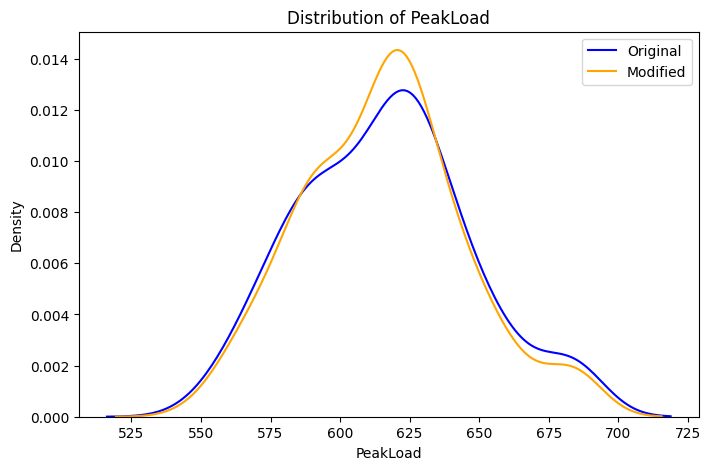

In [ ]:
print(len(data_smogn))

# Tạo một danh sách các cột để vẽ phân phối
columns_to_plot = data.columns.intersection(data_smogn.columns)  # Các cột có mặt trong cả hai DataFrame

# Vẽ phân phối cho từng cột
for column in columns_to_plot:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data[column], label="Original", color="blue")
    sns.kdeplot(data_smogn[column], label="Modified", color="orange")
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


In [ ]:
data_smogn.describe()

,PrintingTemperature,Printingspeed,Printinglayer,Bedtemperature,Strain,Youngsmodulus,PeakLoad
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,207.246360,59.208088,0.191692,35.348527,0.064983,78.256318,615.546976
std,11.436119,10.342357,0.051040,10.917642,0.008353,12.109132,29.014169
min,185.000000,40.000000,0.100000,24.000000,0.056000,48.387097,550.000000
25%,202.824340,53.333333,0.166667,28.000000,0.059297,69.462262,593.333333
50%,207.500000,60.000000,0.200000,30.000000,0.061100,81.345733,617.252412
75%,214.118338,63.530723,0.200000,42.774132,0.068442,84.199256,631.875000
max,230.000000,80.000000,0.300000,60.000000,0.097200,127.954133,685.000000


In [ ]:
data.describe()

,PrintingTemperature,Printingspeed,Printinglayer,Bedtemperature,Strain,Youngsmodulus,PeakLoad
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,207.127483,59.337748,0.194371,35.960265,0.066411,75.299245,616.208609
std,11.519725,10.527001,0.054497,11.176094,0.008731,9.444912,30.722276
min,185.000000,40.000000,0.100000,24.000000,0.056000,48.387097,550.000000
25%,200.000000,53.333333,0.166667,28.500000,0.059700,66.659947,592.500000
50%,207.500000,60.000000,0.200000,30.000000,0.062600,78.728974,618.333333
75%,215.000000,65.000000,0.216667,45.000000,0.073117,83.237988,634.166667
max,230.000000,80.000000,0.300000,60.000000,0.097200,89.285714,685.000000


In [ ]:
from scipy.stats import ks_2samp

ks_statistic, ks_p_value = ks_2samp(data, data_smogn)
print(f"KS Statistic: {ks_statistic}, P-Value: {ks_p_value}")


KS Statistic: [0.0408995  0.02729059 0.05898406 0.02616258 0.06557019 0.06768066
 0.04348301], P-Value: [0.99778174 0.9999996  0.91387035 0.9999999  0.83882398 0.8109164
 0.99494124]


Kết quả từ kiểm tra Kolmogorov-Smirnov (KS) mà bạn nhận được cho thấy giá trị KS statistic và p-value cho từng cặp phân phối được so sánh. Đây là cách hiểu kết quả:

1. KS Statistic
Giá trị KS statistic: Đây là giá trị đo lường sự khác biệt lớn nhất giữa hai phân phối. Giá trị này cho biết sự khác biệt tối đa giữa hàm phân phối tích lũy (CDF) của hai phân phối.
Ví dụ: 0.0408995, 0.02729059, ... là sự khác biệt tối đa giữa CDF của các cặp phân phối.
2. P-Value
P-value: Đây là xác suất để nhận được một giá trị KS statistic như vậy hoặc lớn hơn nếu hai phân phối thực sự là giống nhau. P-value giúp đánh giá mức độ ý nghĩa của sự khác biệt quan sát được.
P-value cao (gần 1) cho thấy không có bằng chứng đủ mạnh để bác bỏ giả thuyết không có sự khác biệt giữa hai phân phối.
P-value thấp (gần 0) cho thấy có bằng chứng đáng kể về sự khác biệt giữa hai phân phối.
Cách diễn giải kết quả:
Nếu P-value gần 1: Điều này cho thấy hai phân phối rất giống nhau hoặc không có sự khác biệt đáng kể. Ví dụ, với các P-value như 0.99778174, 0.9999996, và 0.9999999, có vẻ như các phân phối này rất giống nhau.
Nếu P-value thấp: Điều này cho thấy sự khác biệt giữa hai phân phối là đáng kể. Ví dụ, P-value 0.83882398, 0.8109164 vẫn cao, nên có ít bằng chứng cho thấy có sự khác biệt.
Tổng kết:
Với các P-value cao (như trong kết quả của bạn), không có bằng chứng đáng kể về sự khác biệt giữa các phân phối mà bạn đang so sánh. Điều này có nghĩa là các phân phối này có vẻ khá tương đồng.

Nếu bạn cần so sánh nhiều cặp phân phối, hãy xem xét kết quả của từng cặp và đánh giá dựa trên mức độ ý nghĩa thống kê và mục tiêu của nghiên cứu.

In [ ]:
from scipy.stats import entropy

# Giả sử bạn đã chuẩn bị histograms cho phân phối
hist1, bin_edges1 = np.histogram(data, bins=30, density=True)
hist2, bin_edges2 = np.histogram(data_smogn, bins=30, density=True)

# Thay thế giá trị 0 bằng giá trị nhỏ hơn để tránh lỗi log(0)
hist1 += 1e-10
hist2 += 1e-10

kl_divergence = entropy(hist1, hist2)
print(f"KL Divergence: {kl_divergence}")


KL Divergence: 0.0024733237298635393


# Sự khác biệt giữa hai phân phối là rất nhỏ

# Thử nghiệm với Feature distribution smoothing

In [ ]:
# import smogn

# col = ['PrintingTemperature', 'Printingspeed', 'Printinglayer', 'Bedtemperature', 'Strain', 'Youngsmodulus', 'PeakLoad']


df= data.copy()

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Giả sử df là DataFrame chứa dữ liệu của bạn
# df = pd.read_csv('your_data.csv') # Nếu bạn đọc dữ liệu từ file CSV

# Xác định cột đầu vào (X) và cột đầu ra (y)
X = df[['PrintingTemperature', 'Printingspeed', 'Printinglayer', 'Bedtemperature', 'Strain', 'Youngsmodulus']]
y = df[['PeakLoad']]

# Chuyển đổi y thành một mảng một chiều
y = y.values.ravel()

# Làm mịn phân phối của các đặc trưng
def feature_distribution_smoothing(X, y, smooth_factor=0.1):
    # Chia dữ liệu thành nhóm thiểu số và đa số
    minority_mask = y < np.percentile(y, 10)  # Ví dụ: chọn 10% giá trị thấp nhất là nhóm thiểu số
    majority_mask = y >= np.percentile(y, 10)

    X_minority = X[minority_mask]
    y_minority = y[minority_mask]
    X_majority = X[majority_mask]
    y_majority = y[majority_mask]

    # Tạo mẫu cho nhóm thiểu số
    X_smoothed_minority = np.clip(X_minority + np.random.normal(0, smooth_factor, X_minority.shape), 0, np.inf)
    y_smoothed_minority = np.clip(y_minority + np.random.normal(0, smooth_factor, y_minority.shape), y.min(), y.max())

    # Kết hợp dữ liệu đã làm mịn với dữ liệu gốc
    X_balanced = np.vstack((X_majority, X_smoothed_minority))
    y_balanced = np.concatenate((y_majority, y_smoothed_minority))

    return X_balanced, y_balanced

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Áp dụng Feature Distribution Smoothing
X_train_balanced, y_train_balanced = feature_distribution_smoothing(X_train, y_train)

# Tiền xử lý dữ liệu
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Xây dựng mô hình hồi quy
model = GradientBoostingRegressor()
model.fit(X_train_balanced, y_train_balanced)

# Dự đoán và đánh giá
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")



Mean Squared Error: 269.2138211639875


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


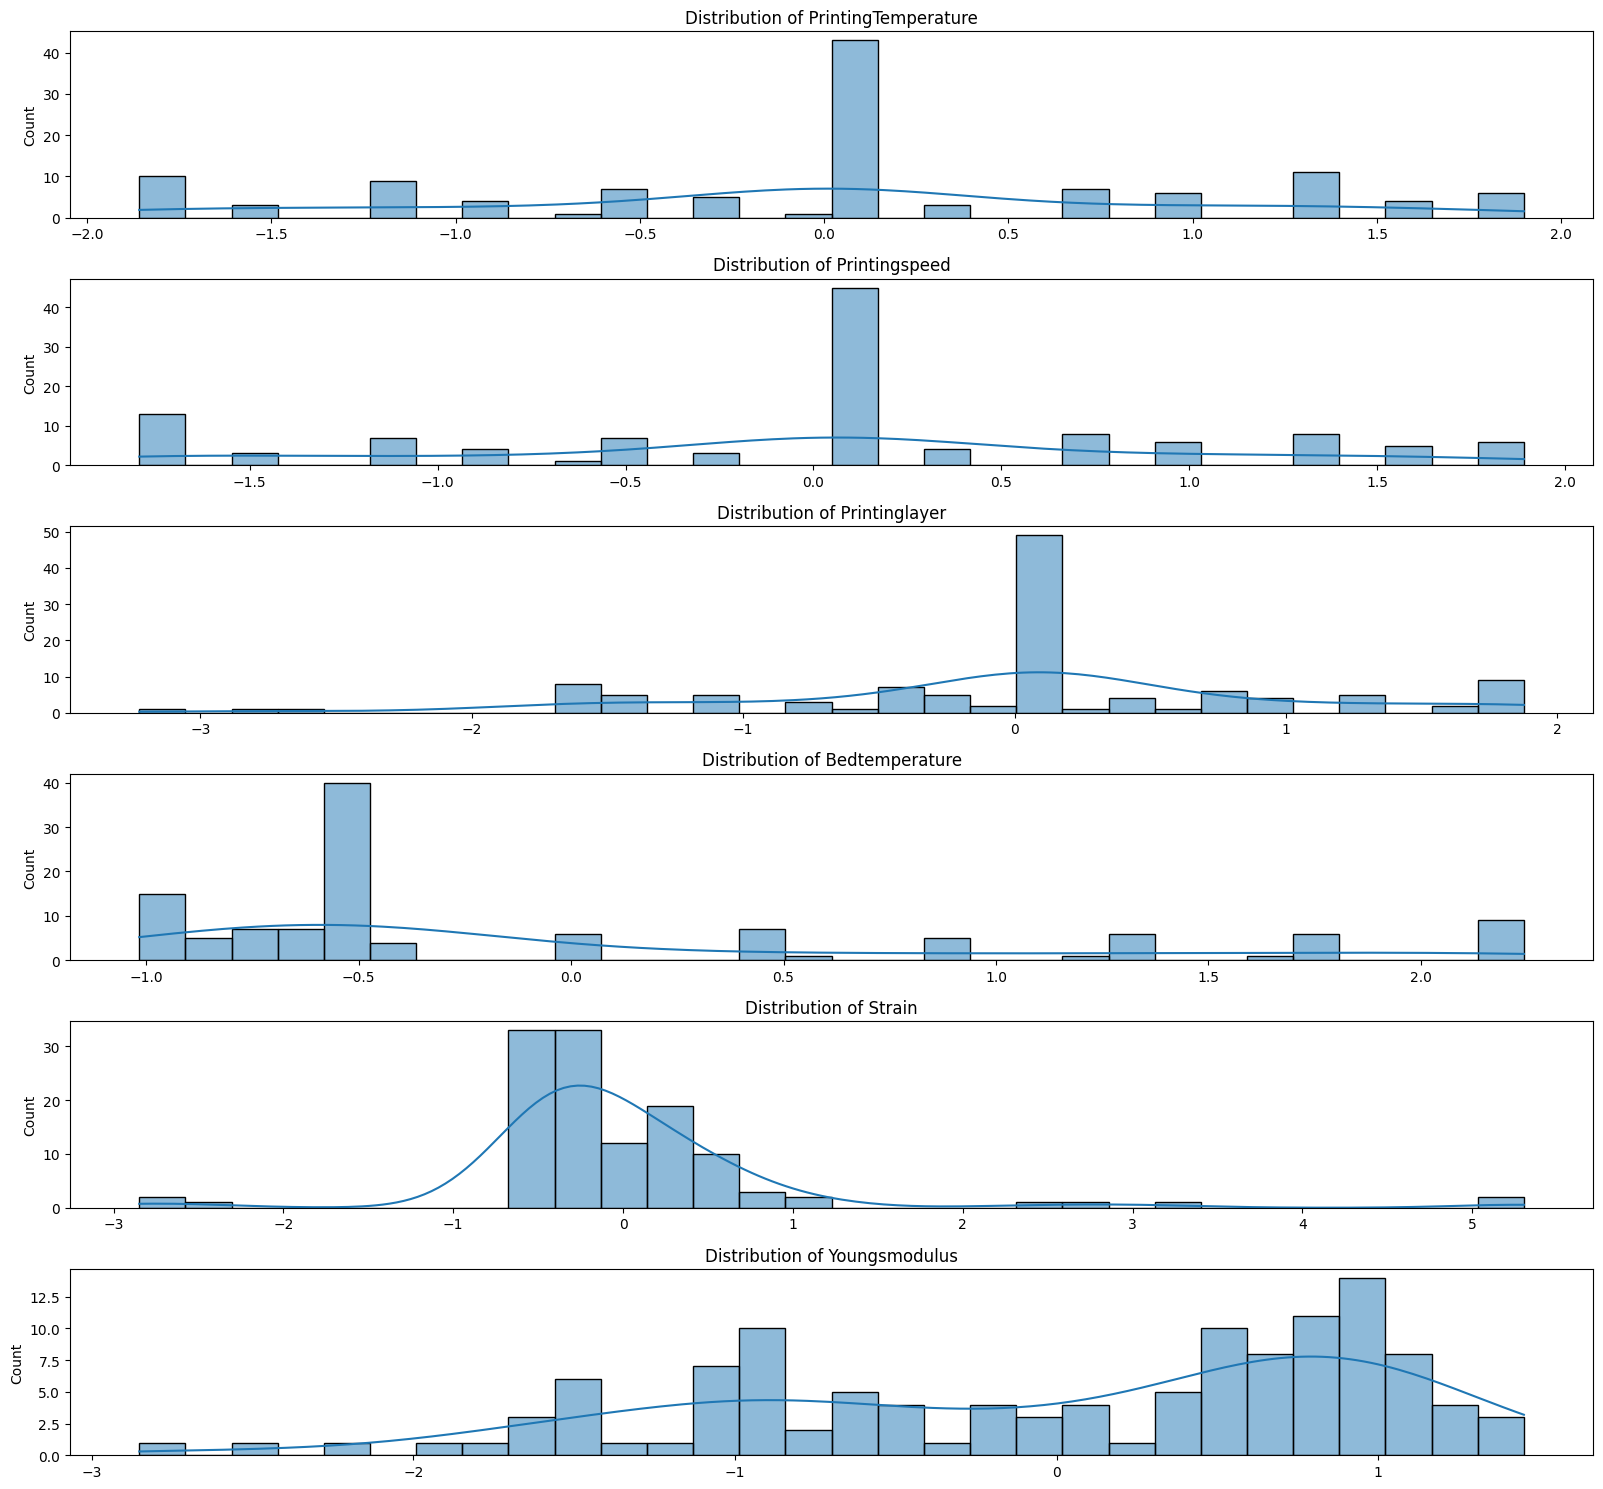

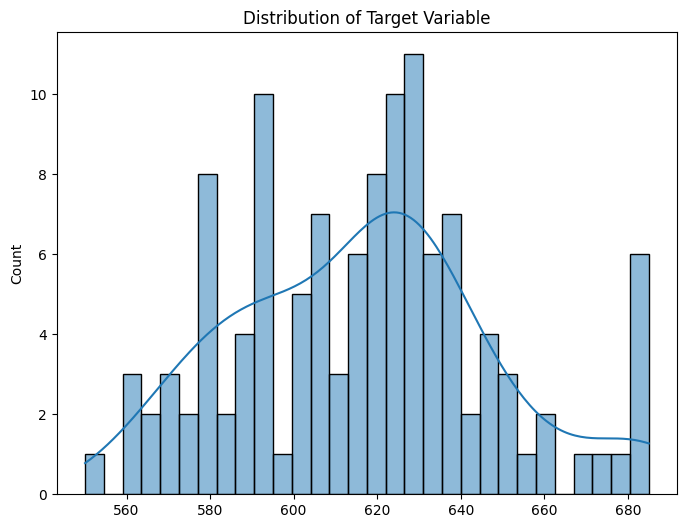

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ phân phối của các đặc trưng trong X_train_balanced
def plot_feature_distributions(X, feature_names):
    plt.figure(figsize=(16, 15))
    for i, feature in enumerate(feature_names):
        plt.subplot(len(feature_names), 1, i + 1)
        sns.histplot(X[:, i], kde=True, bins=30)
        plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

# Vẽ phân phối của giá trị mục tiêu y_train_balanced
def plot_target_distribution(y):
    plt.figure(figsize=(8, 6))
    sns.histplot(y, kde=True, bins=30)
    plt.title('Distribution of Target Variable')
    plt.show()

# Vẽ phân phối cho X_train_balanced
plot_feature_distributions(X_train_balanced, ['PrintingTemperature', 'Printingspeed', 'Printinglayer', 'Bedtemperature', 'Strain', 'Youngsmodulus'])

# Vẽ phân phối cho y_train_balanced
plot_target_distribution(y_train_balanced)


Dùng các phương pháp kết hợp

r_index: 100%|##########| 39/39 [00:00<00:00, 385.37it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Mean Squared Error: 245.46998948581793


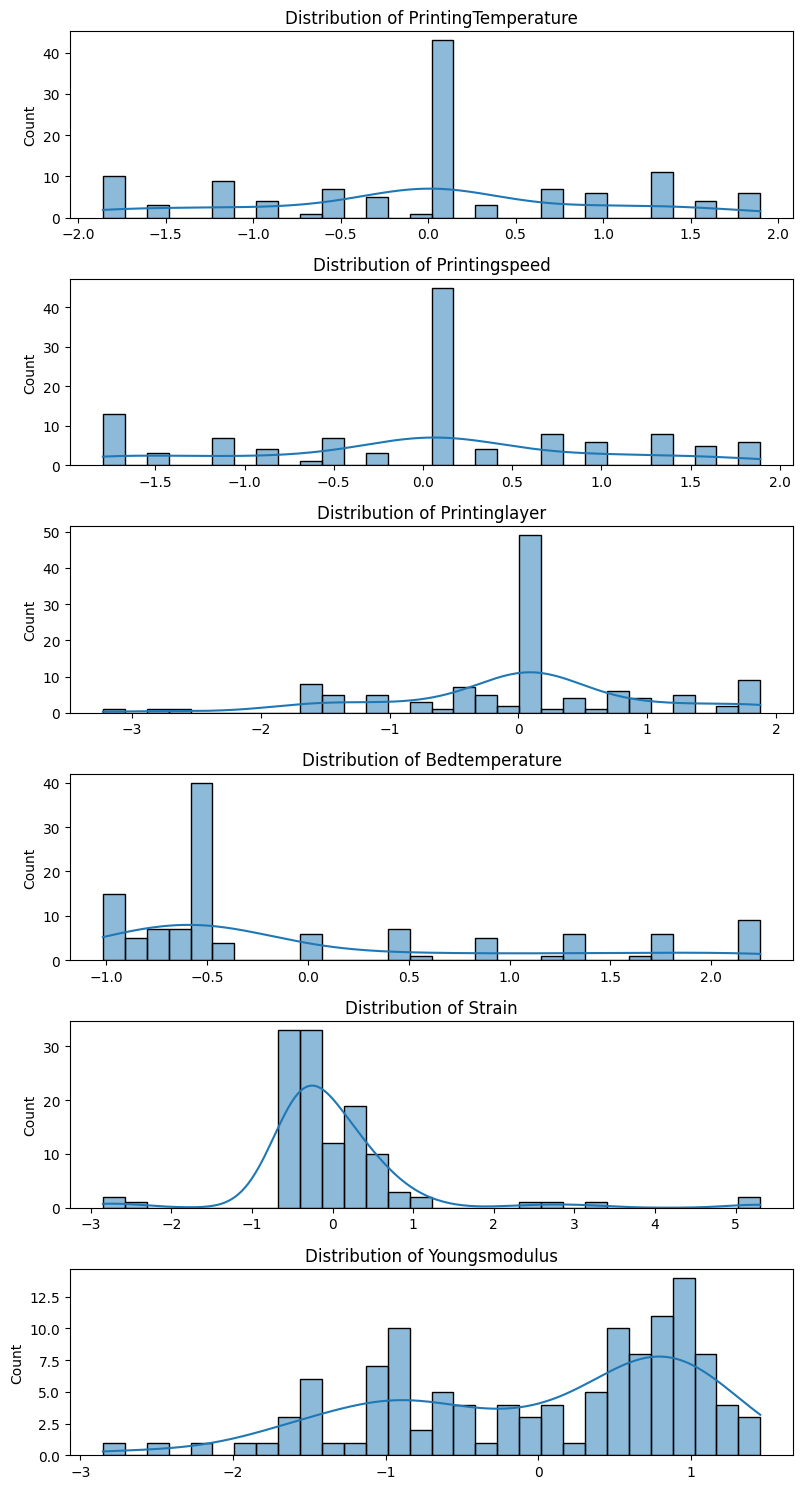

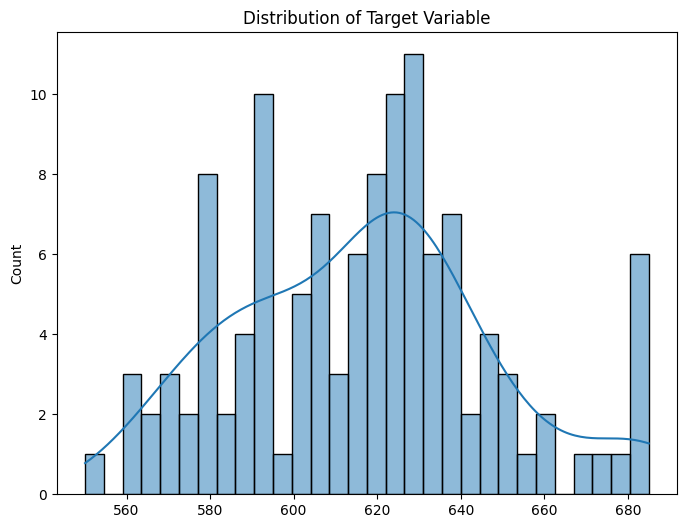

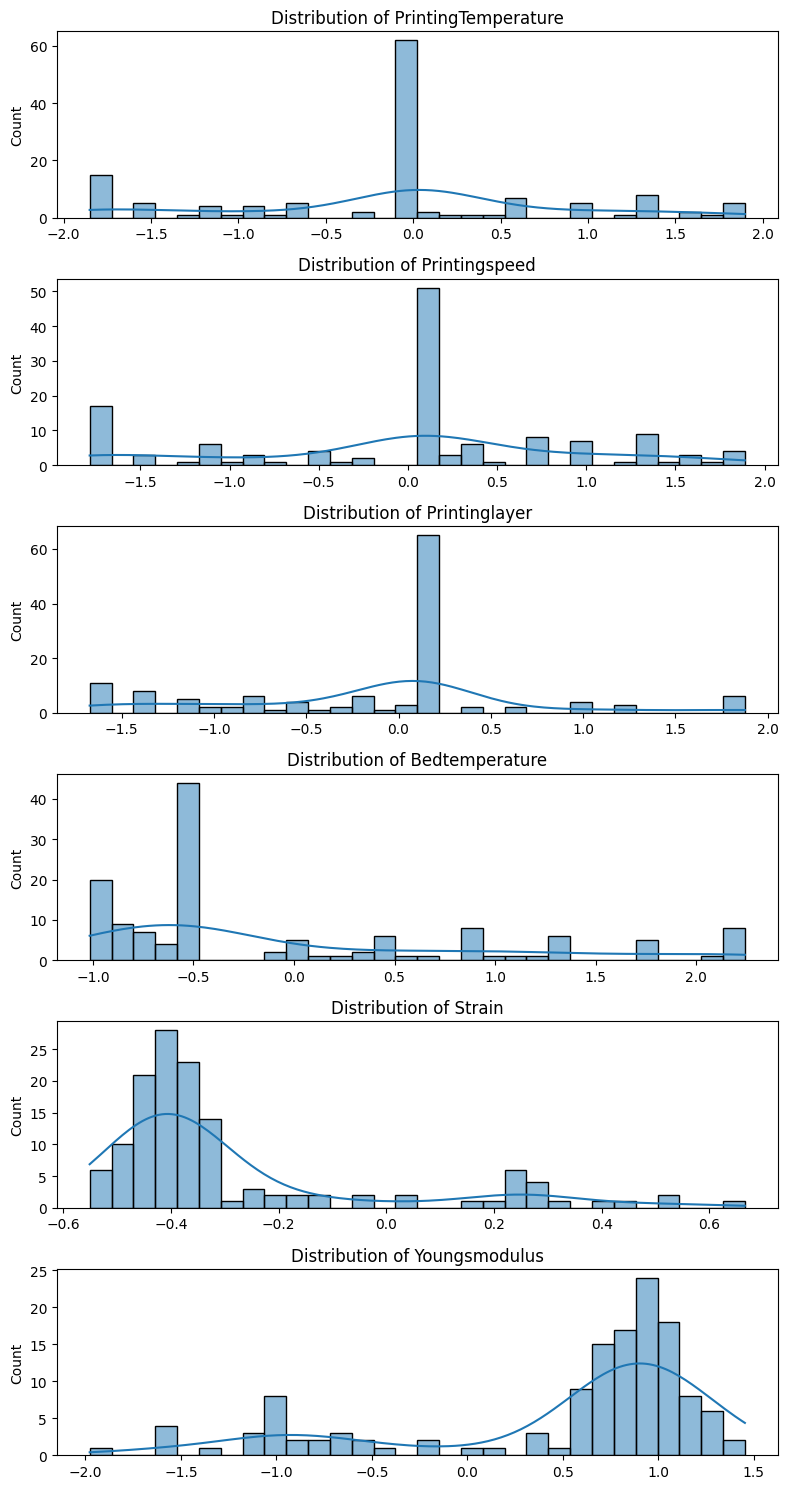

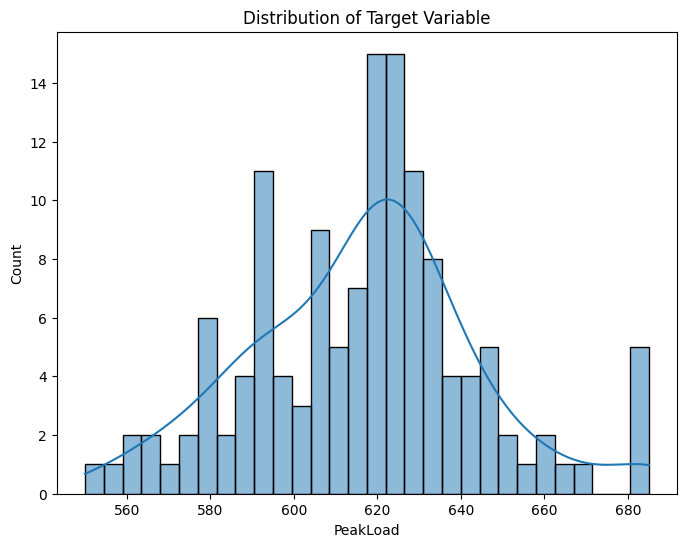

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import smogn

# Giả sử df là DataFrame chứa dữ liệu của bạn
# df = pd.read_csv('your_data.csv') # Nếu bạn đọc dữ liệu từ file CSV

# Xác định cột đầu vào (X) và cột đầu ra (y)
X = df[['PrintingTemperature', 'Printingspeed', 'Printinglayer', 'Bedtemperature', 'Strain', 'Youngsmodulus']]
y = df[['PeakLoad']].values.ravel()  # Chuyển đổi y thành một mảng một chiều

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Áp dụng Label Distribution Smoothing
def label_distribution_smoothing(y, smooth_factor=0.1):
    y_min = np.min(y)
    y_max = np.max(y)
    y_smoothed = y + np.random.normal(0, smooth_factor, y.shape)
    y_smoothed = np.clip(y_smoothed, y_min, y_max)
    return y_smoothed

# Áp dụng Feature Distribution Smoothing
def feature_distribution_smoothing(X, y, smooth_factor=0.1):
    minority_mask = y < np.percentile(y, 10)  # Ví dụ: chọn 10% giá trị thấp nhất là nhóm thiểu số
    majority_mask = y >= np.percentile(y, 10)

    X_minority = X[minority_mask]
    y_minority = y[minority_mask]
    X_majority = X[majority_mask]
    y_majority = y[majority_mask]

    X_smoothed_minority = np.clip(X_minority + np.random.normal(0, smooth_factor, X_minority.shape), 0, np.inf)
    y_smoothed_minority = np.clip(y_minority + np.random.normal(0, smooth_factor, y_minority.shape), y.min(), y.max())

    X_balanced = np.vstack((X_majority, X_smoothed_minority))
    y_balanced = np.concatenate((y_majority, y_smoothed_minority))

    return X_balanced, y_balanced

# Áp dụng Label Distribution Smoothing
y_train_smoothed = label_distribution_smoothing(y_train)

# Áp dụng Feature Distribution Smoothing
X_train_balanced, y_train_balanced = feature_distribution_smoothing(X_train, y_train_smoothed)

# Áp dụng SMOGN cho dữ liệu không cân bằng
df_smogn = data.copy()
smogn_data = smogn.smoter(    ## main arguments
    data = df_smogn,           ## pandas dataframe
    y = 'Youngsmodulus',          ## string ('header name')
    k = 3,                    ## positive integer (k < n)
    samp_method = 'extreme',  ## string ('balance' or 'extreme')

    ## phi relevance arguments
    rel_thres = 0.40,         ## positive real number (0 < R < 1)
    # rel_method = 'manual',      ## string ('auto' or 'manual')
    rel_xtrm_type = 'high',   ## string ('low' or 'both' or 'high')
    rel_coef = 0.10  )

# Tách dữ liệu đã được tăng cường
X_smogn = smogn_data[['PrintingTemperature', 'Printingspeed', 'Printinglayer', 'Bedtemperature', 'Strain', 'Youngsmodulus']]
y_smogn = smogn_data['PeakLoad']

# Tiền xử lý dữ liệu
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)
X_smogn = scaler.transform(X_smogn)

# Xây dựng mô hình hồi quy
model = GradientBoostingRegressor()
model.fit(X_train_balanced, y_train_balanced)

# Dự đoán và đánh giá
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

# Vẽ phân phối của các đặc trưng trong X_train_balanced
def plot_feature_distributions(X, feature_names):
    plt.figure(figsize=(8, 15))
    for i, feature in enumerate(feature_names):
        plt.subplot(len(feature_names), 1, i + 1)
        sns.histplot(X[:, i], kde=True, bins=30)
        plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

# Vẽ phân phối của giá trị mục tiêu y_train_balanced
def plot_target_distribution(y):
    plt.figure(figsize=(8, 6))
    sns.histplot(y, kde=True, bins=30)
    plt.title('Distribution of Target Variable')
    plt.show()

# Vẽ phân phối cho X_train_balanced
plot_feature_distributions(X_train_balanced, ['PrintingTemperature', 'Printingspeed', 'Printinglayer', 'Bedtemperature', 'Strain', 'Youngsmodulus'])

# Vẽ phân phối cho y_train_balanced
plot_target_distribution(y_train_balanced)

# Vẽ phân phối cho X_smogn (dữ liệu sau khi áp dụng SMOGN)
plot_feature_distributions(X_smogn, ['PrintingTemperature', 'Printingspeed', 'Printinglayer', 'Bedtemperature', 'Strain', 'Youngsmodulus'])

# Vẽ phân phối cho y_smogn (dữ liệu mục tiêu sau khi áp dụng SMOGN)
plot_target_distribution(y_smogn)


# sử dụng theo thứ tự

r_index: 100%|##########| 46/46 [00:00<00:00, 297.89it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Mean Squared Error: 1230.7925379869268


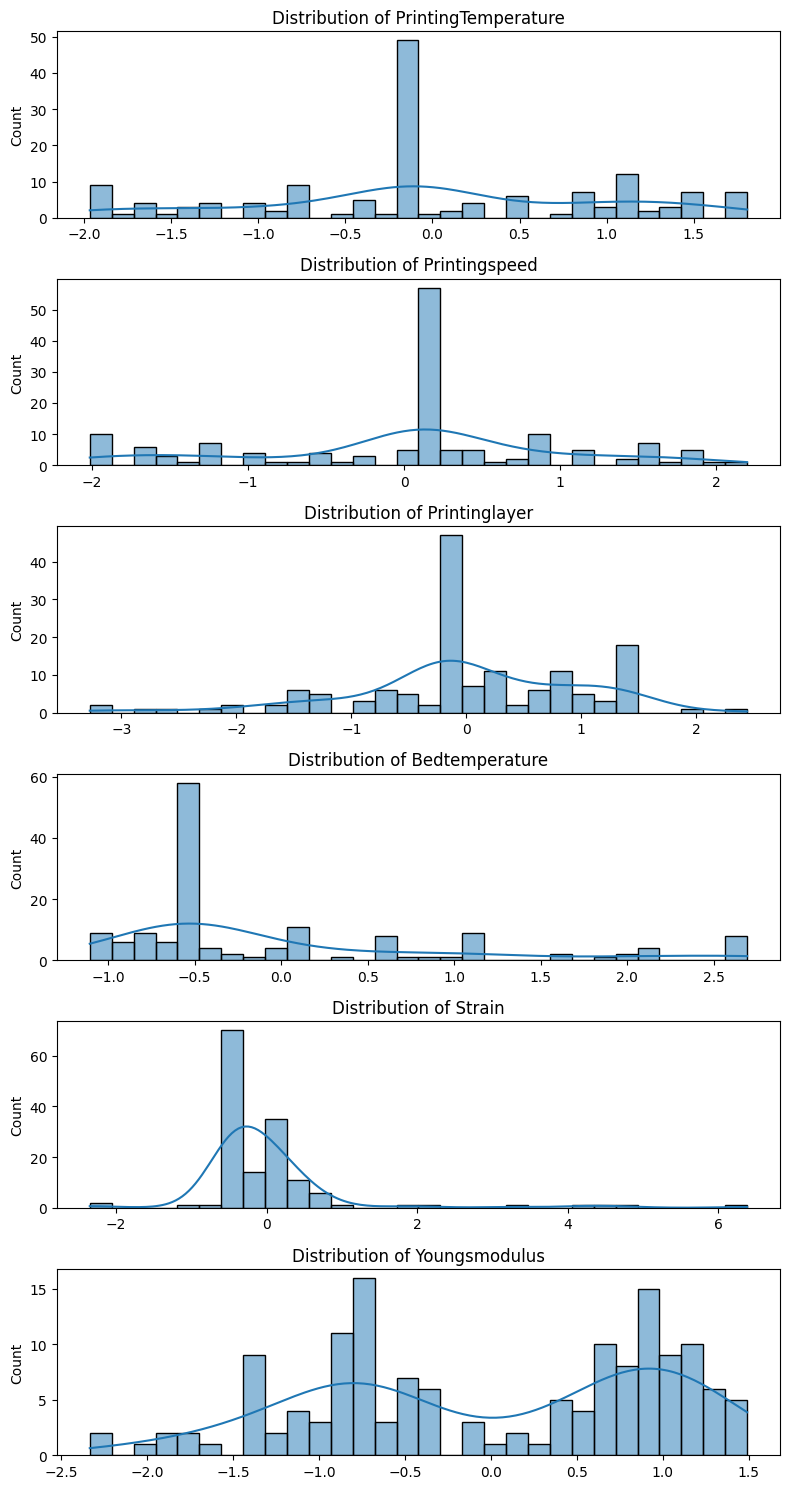

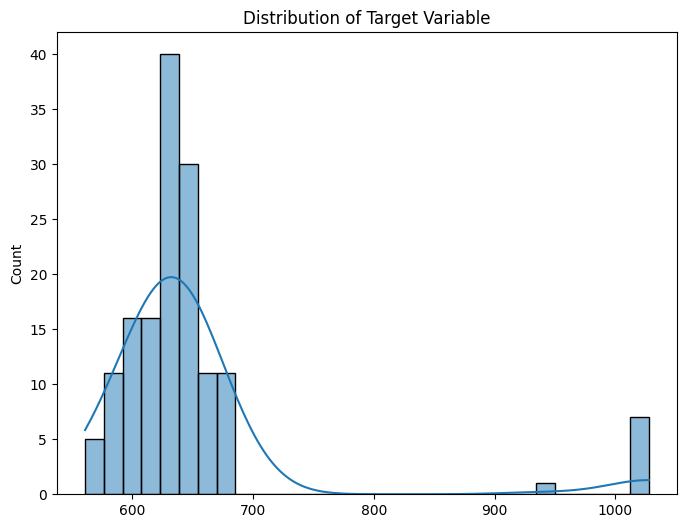

In [ ]:

# Xác định cột đầu vào (X) và cột đầu ra (y)
X = df[['PrintingTemperature', 'Printingspeed', 'Printinglayer', 'Bedtemperature', 'Strain', 'Youngsmodulus']]
y = df[['PeakLoad']].values.ravel()  # Chuyển đổi y thành một mảng một chiều

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Áp dụng SMOGN cho dữ liệu không cân bằng
df_smogn = data.copy()
smogn_data = smogn.smoter(
    data=df_smogn,           # DataFrame chứa dữ liệu
    y='PeakLoad',            # Cột mục tiêu
    k=3,                     # Số lượng lân cận gần nhất
    samp_method='extreme',   # Phương pháp lấy mẫu
    rel_thres=0.40,          # Ngưỡng liên quan
    rel_xtrm_type='high',    # Loại giá trị liên quan
    rel_coef=0.10            # Hệ số liên quan
)

# Tách dữ liệu đã được tăng cường
X_smogn = smogn_data[['PrintingTemperature', 'Printingspeed', 'Printinglayer', 'Bedtemperature', 'Strain', 'Youngsmodulus']]
y_smogn = smogn_data['PeakLoad']

# Áp dụng Label Distribution Smoothing
def label_distribution_smoothing(y, smooth_factor=0.1):
    y_min = np.min(y)
    y_max = np.max(y)
    y_smoothed = y + np.random.normal(0, smooth_factor, y.shape)
    y_smoothed = np.clip(y_smoothed, y_min, y_max)
    return y_smoothed

# Áp dụng Feature Distribution Smoothing
def feature_distribution_smoothing(X, y, smooth_factor=0.1):
    minority_mask = y < np.percentile(y, 10)  # Ví dụ: chọn 10% giá trị thấp nhất là nhóm thiểu số
    majority_mask = y >= np.percentile(y, 10)

    X_minority = X[minority_mask]
    y_minority = y[minority_mask]
    X_majority = X[majority_mask]
    y_majority = y[majority_mask]

    X_smoothed_minority = np.clip(X_minority + np.random.normal(0, smooth_factor, X_minority.shape), 0, np.inf)
    y_smoothed_minority = np.clip(y_minority + np.random.normal(0, smooth_factor, y_minority.shape), y.min(), y.max())

    X_balanced = np.vstack((X_majority, X_smoothed_minority))
    y_balanced = np.concatenate((y_majority, y_smoothed_minority))

    return X_balanced, y_balanced

# Áp dụng Label Distribution Smoothing cho y_smogn
y_smogn_smoothed = label_distribution_smoothing(y_smogn)

# Áp dụng Feature Distribution Smoothing cho X_smogn
X_smogn_balanced, y_smogn_balanced = feature_distribution_smoothing(X_smogn, y_smogn_smoothed)

# Tiền xử lý dữ liệu
scaler = StandardScaler()
X_smogn_balanced = scaler.fit_transform(X_smogn_balanced)
X_test = scaler.transform(X_test)

# Xây dựng mô hình hồi quy
model = GradientBoostingRegressor()
model.fit(X_smogn_balanced, y_smogn_balanced)

# Dự đoán và đánh giá
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

# Vẽ phân phối cho X_smogn_balanced
plot_feature_distributions(X_smogn_balanced, ['PrintingTemperature', 'Printingspeed', 'Printinglayer', 'Bedtemperature', 'Strain', 'Youngsmodulus'])

# Vẽ phân phối cho y_smogn_balanced
plot_target_distribution(y_smogn_balanced)


# Thủ sử dụng phân cụm

In [ ]:
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Giả sử data và y_train là DataFrame/Pandas Series
X_train = data.copy()

# Áp dụng phân cụm
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_train)

# Thêm thông tin cụm vào dữ liệu huấn luyện
X_train['Cluster'] = clusters

# Cân bằng dữ liệu trong từng cụm với SMOTE
smote = SMOTE(sampling_strategy='minority')
X_train_balanced = pd.DataFrame()
y_train_balanced = pd.Series(dtype=np.float64)

for cluster in range(3):  # Nhãn cụm là 0, 1, 2
    # Lọc dữ liệu theo cụm
    X_cluster = X_train[X_train['Cluster'] == cluster].drop('Cluster', axis=1)
    y_cluster = y_train[X_train['Cluster'] == cluster]

    # Cân bằng dữ liệu trong từng cụm với SMOTE
    X_cluster_balanced, y_cluster_balanced = smote.fit_resample(X_cluster, y_cluster)

    # Kết hợp dữ liệu sau khi cân bằng
    X_train_balanced = pd.concat([X_train_balanced, pd.DataFrame(X_cluster_balanced, columns=X_train.columns[:-1])])
    y_train_balanced = pd.concat([y_train_balanced, pd.Series(y_cluster_balanced)])

# X_train_balanced bây giờ có các biến đầu vào đã được cân bằng trong từng cụm
# y_train_balanced là các biến mục tiêu tương ứng


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

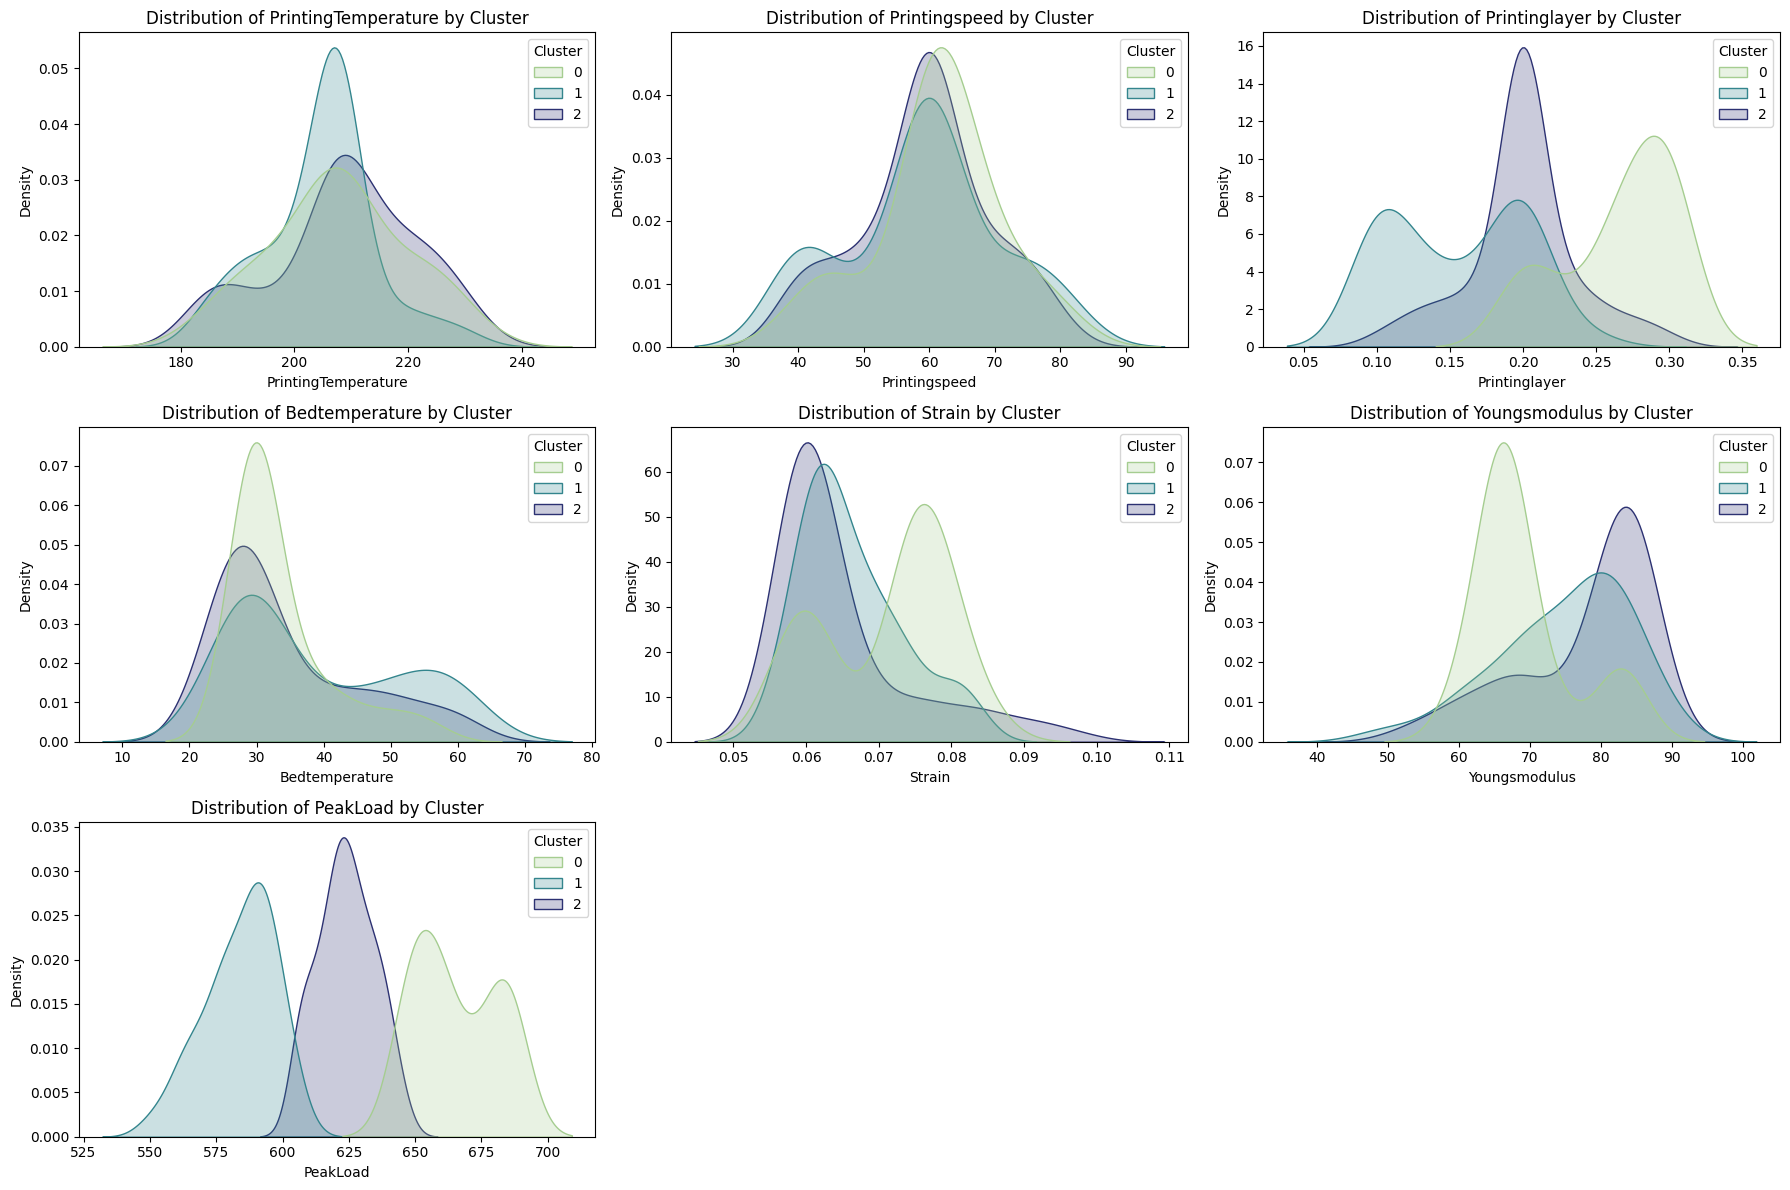

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử data là DataFrame của bạn

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(18, 12))

# Lặp qua các cột cần vẽ
features = ['PrintingTemperature', 'Printingspeed', 'Printinglayer',
            'Bedtemperature', 'Strain', 'Youngsmodulus', 'PeakLoad']

for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(data=X_train, x=feature, hue="Cluster", fill=True, common_norm=False, palette="crest")
    plt.title(f'Distribution of {feature} by Cluster')

plt.tight_layout()
plt.show()
